In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "wine-quality-dataset"

# **Import**

In [2]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)


Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **1. Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/wine-quality-dataset/winequality-red.csv',sep = ';')

In [4]:
str(df)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


In [5]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fixed.acidity,1,1599,8.31963727,1.741096318,7.90000,8.15253708,1.482600000,4.60000,15.90000,11.30000,0.98090840,1.1196987,0.0435410166
volatile.acidity,2,1599,0.52782051,0.179059704,0.52000,0.51806792,0.177912000,0.12000,1.58000,1.46000,0.67033307,1.2126893,0.0044778922
citric.acid,3,1599,0.27097561,0.194801137,0.26000,0.26128806,0.252042000,0.00000,1.00000,1.00000,0.31774029,-0.7930455,0.0048715510
residual.sugar,4,1599,2.53880550,1.409928060,2.20000,2.25835285,0.444780000,0.90000,15.50000,14.60000,4.53213992,28.4850200,0.0352592217
chlorides,5,1599,0.08746654,0.047065302,0.07900,0.08023497,0.014826000,0.01200,0.61100,0.59900,5.66969370,41.5259635,0.0011770004
free.sulfur.dioxide,6,1599,15.87492183,10.460156970,14.00000,14.57728337,10.378200000,1.00000,72.00000,71.00000,1.24822199,2.0072212,0.2615856825
total.sulfur.dioxide,7,1599,46.46779237,32.895324478,38.00000,41.84309133,26.686800000,6.00000,289.00000,283.00000,1.51268904,3.7856764,0.8226402272
density,8,1599,0.99674668,0.001887334,0.99675,0.99673621,0.001675338,0.99007,1.00369,0.01362,0.07115397,0.9225000,0.0000471981
pH,9,1599,3.31111320,0.154386465,3.31000,3.30909446,0.148260000,2.74000,4.01000,1.27000,0.19332027,0.7959191,0.0038608683


**Check missing value**

In [6]:
colSums(is.na(df))

fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol              quality 
                   0                    0                    0

**Duplicate check**

In [7]:
sum(duplicated(df))

[1] 240

In [8]:
summary(df)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [9]:
head(df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [10]:
tail(df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1594,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6
1595,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
1599,6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


# **2. Data Visualization for Visualization**

In [11]:
num_cols <- {}

for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == TRUE)
        num_cols <- c(num_cols ,colnames(df[i]))
}

In [12]:
options(repr.plot.width = 16.0, repr.plot.height = 8.0)

## **Histogram & Boxplot**

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


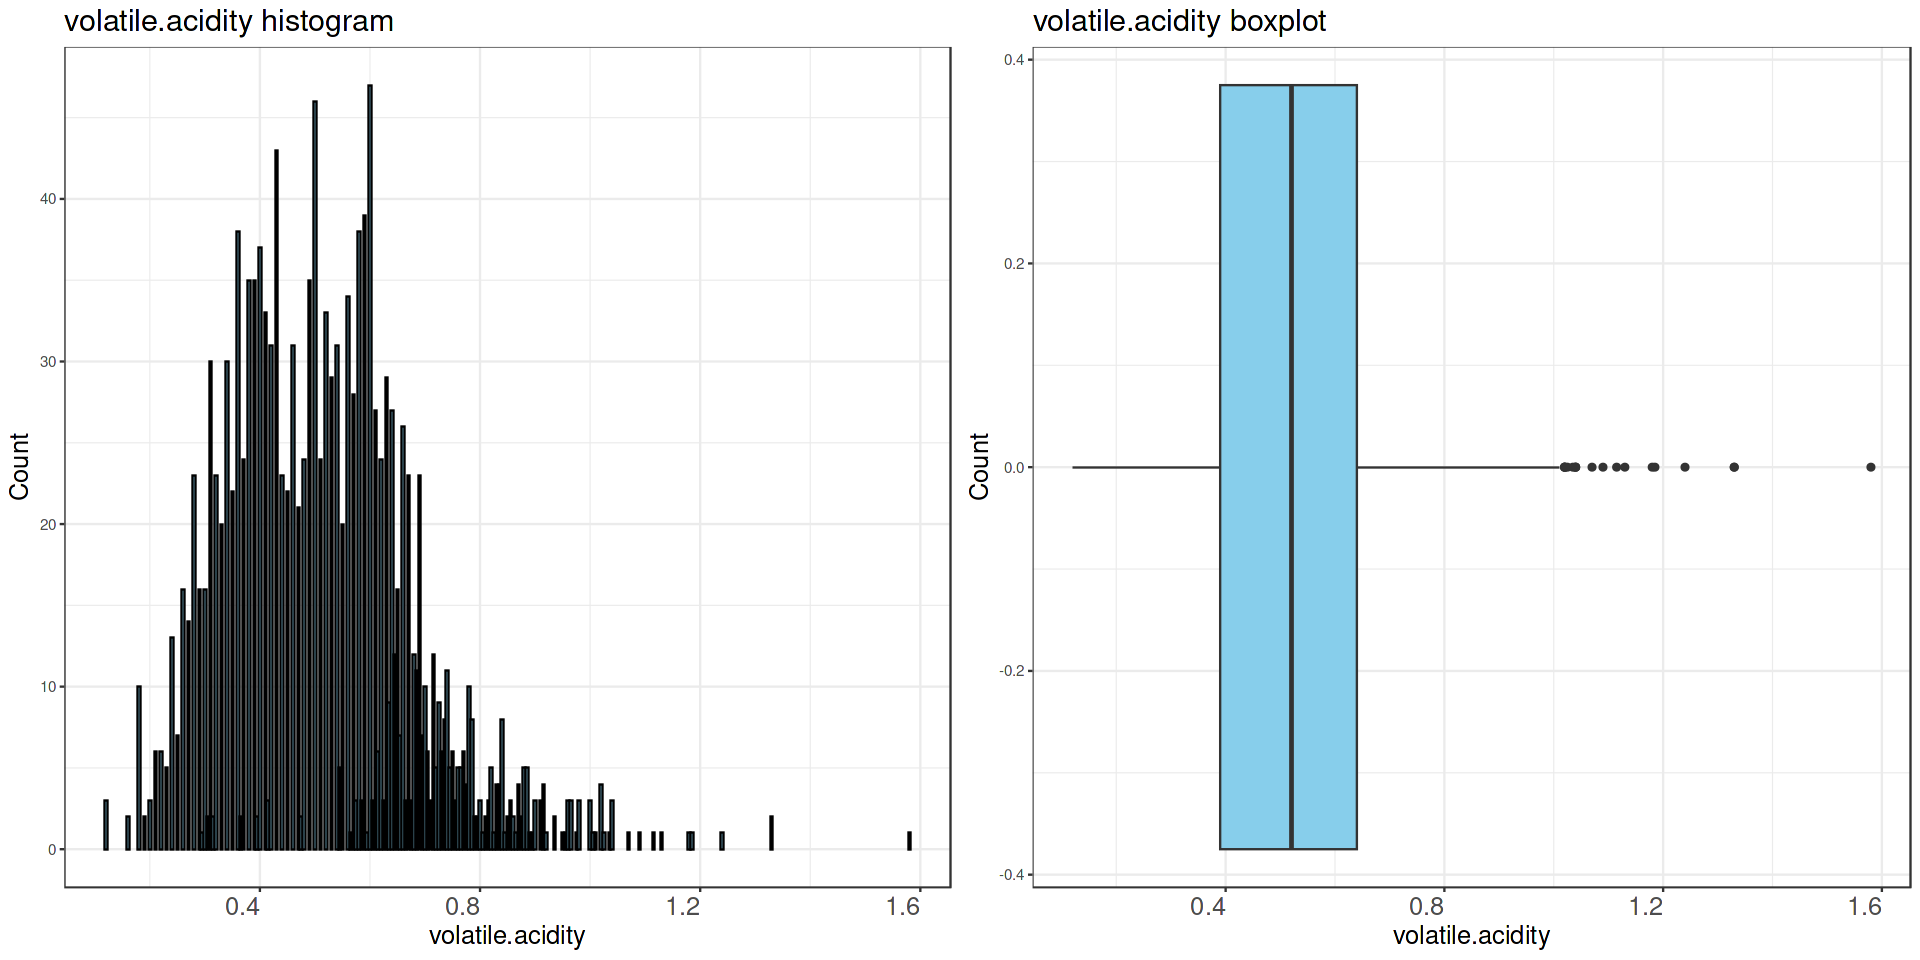

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


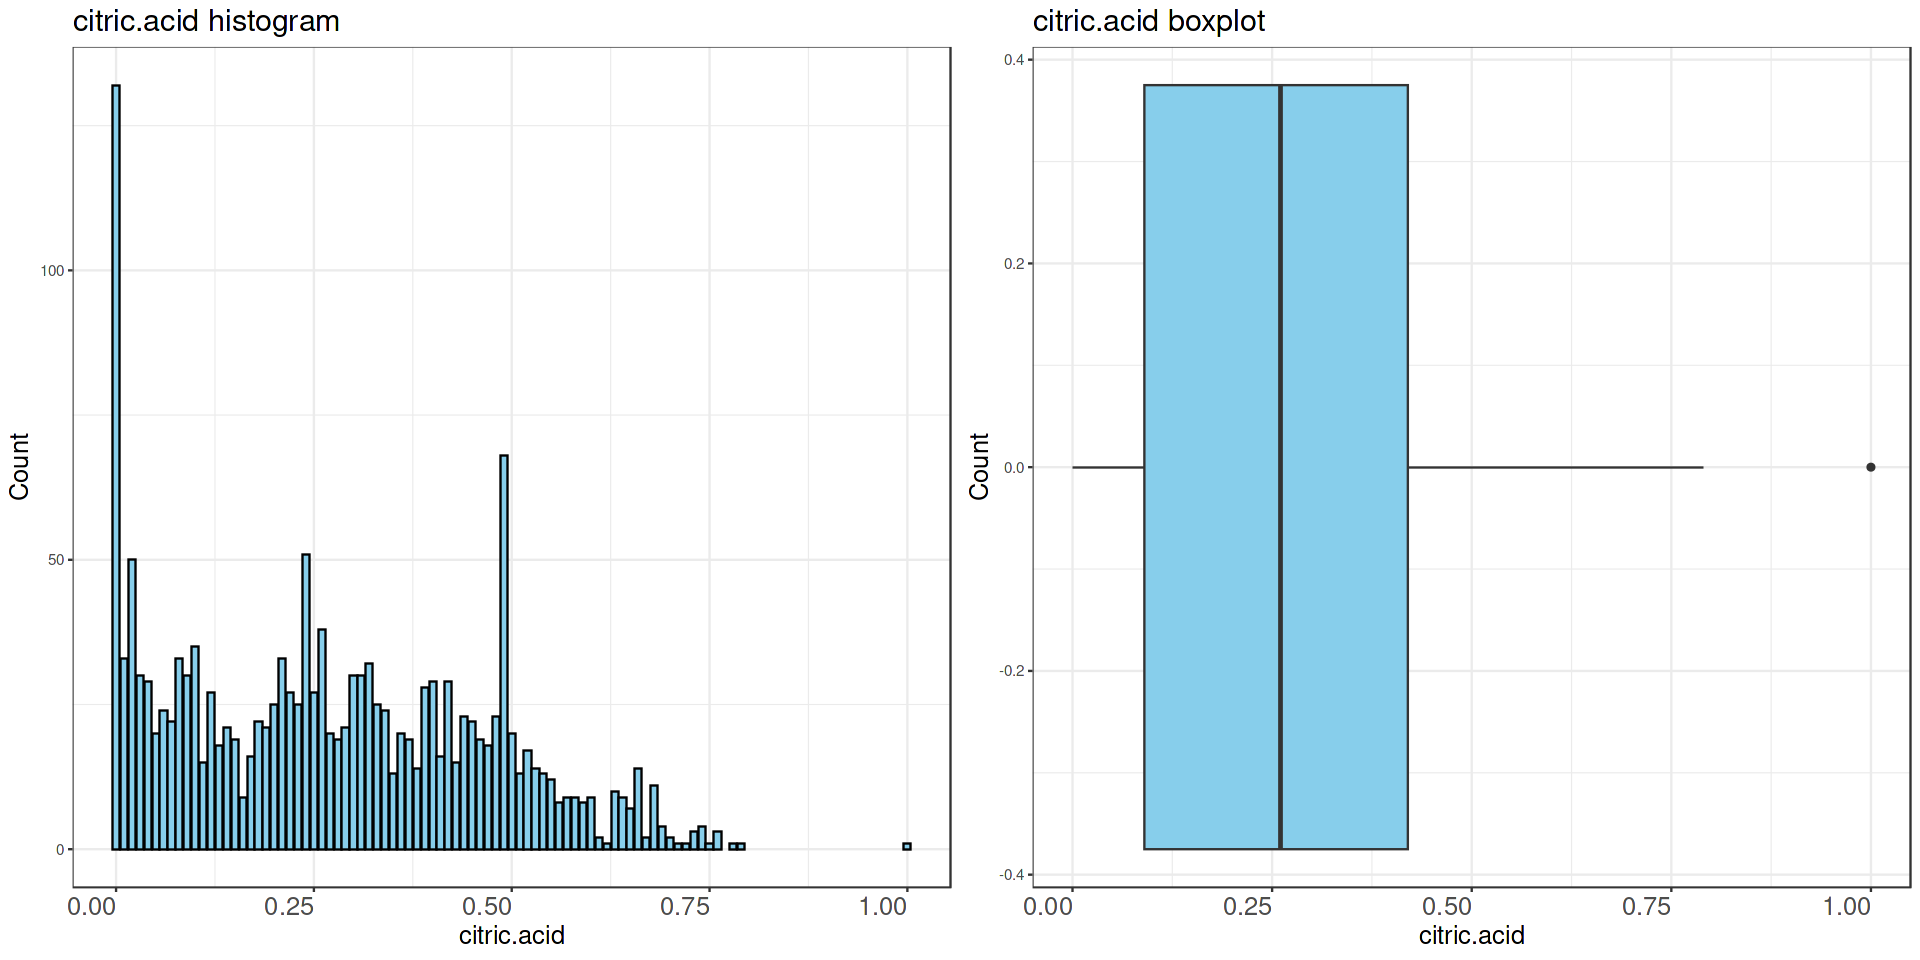

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


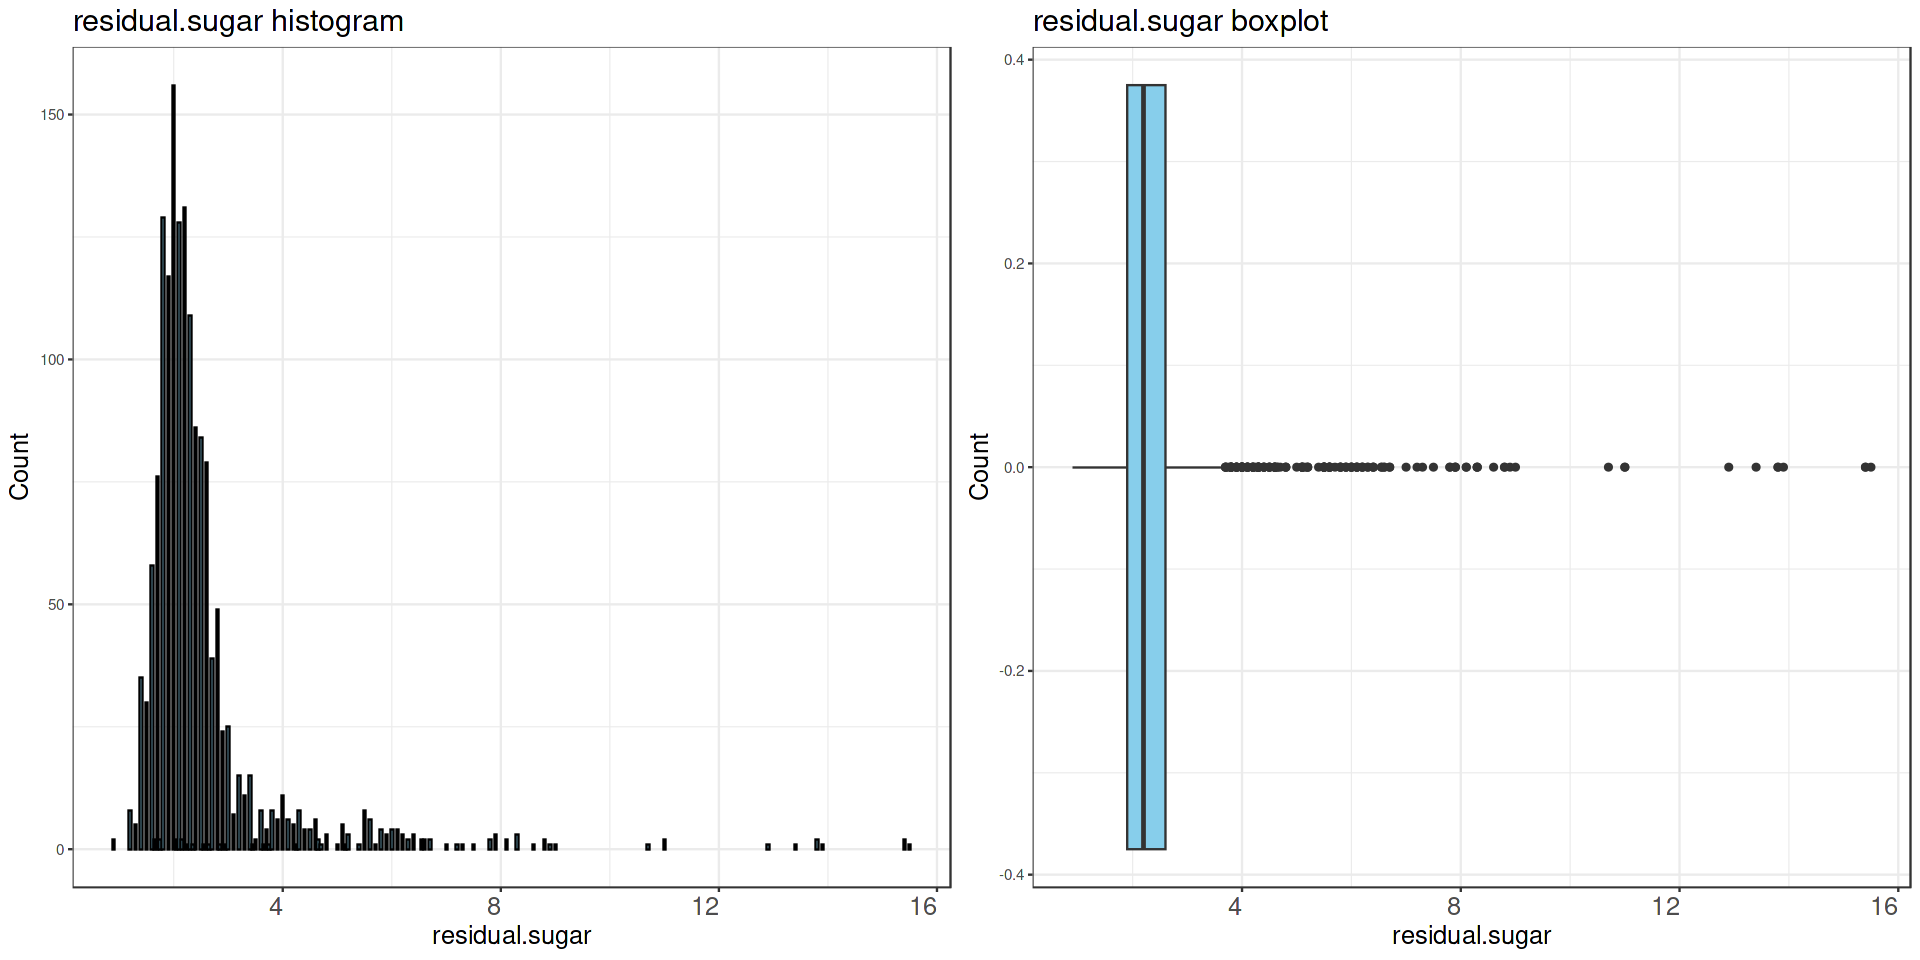

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


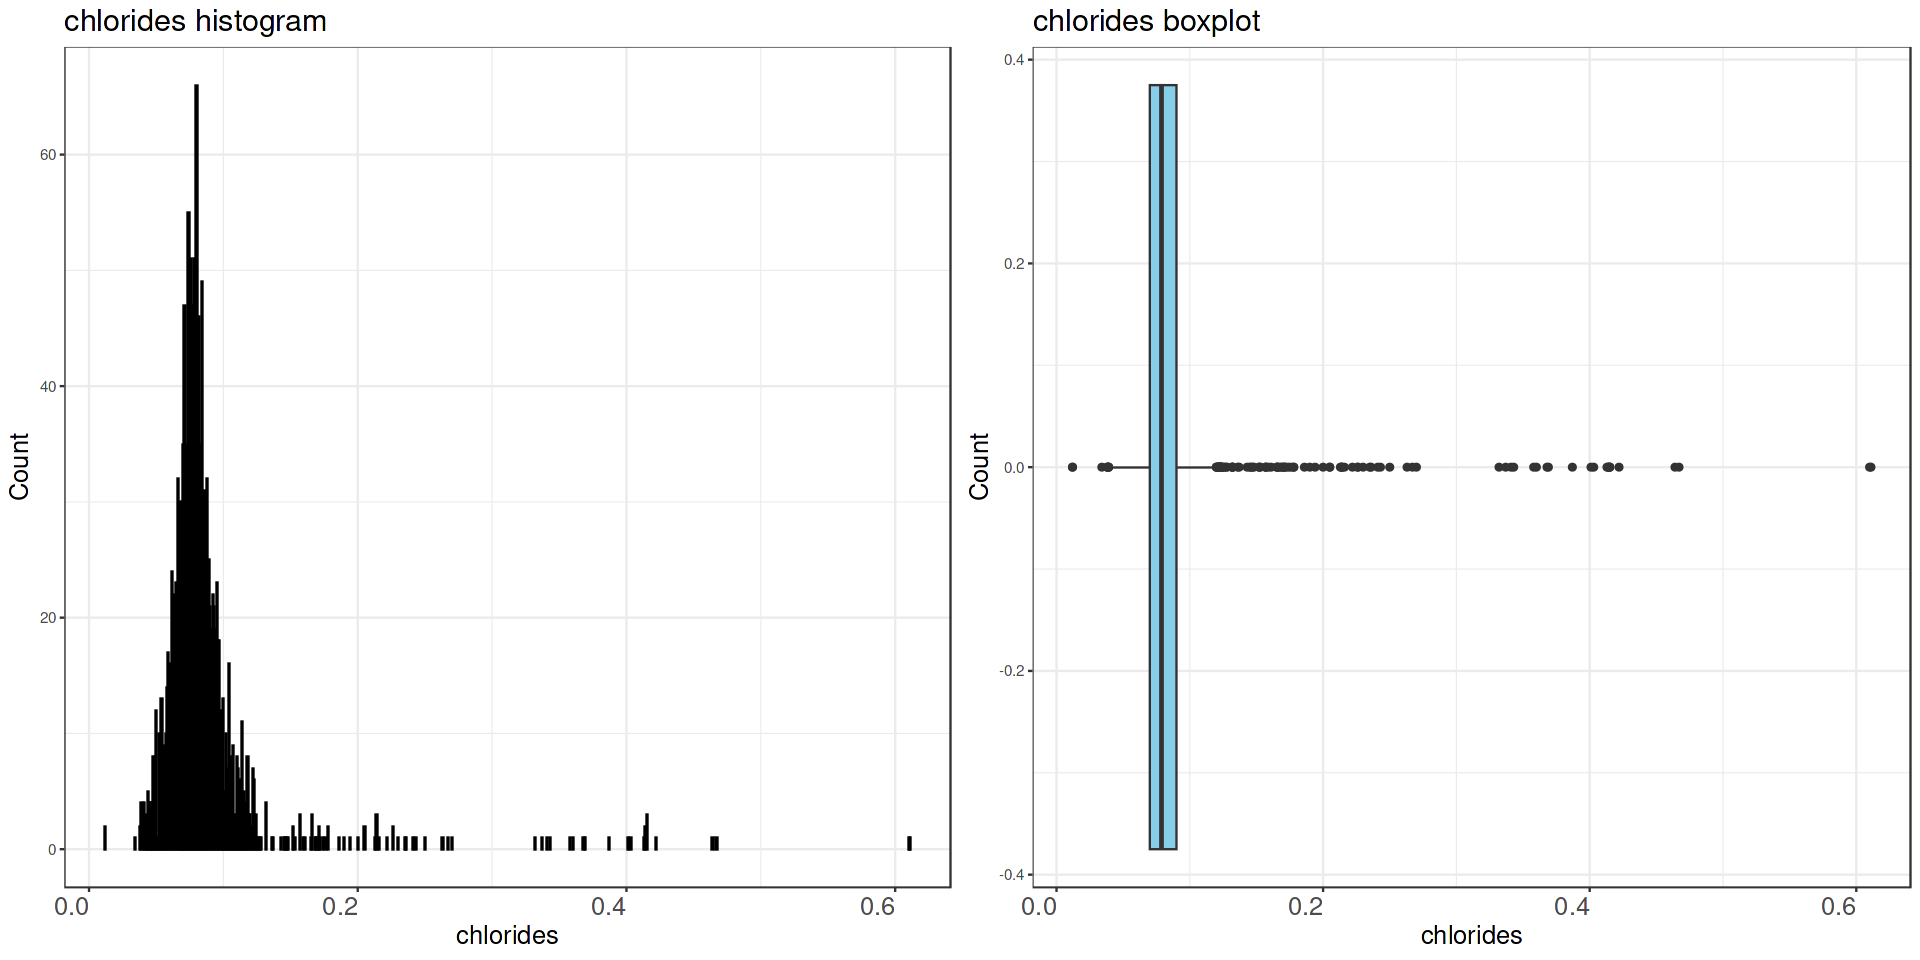

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


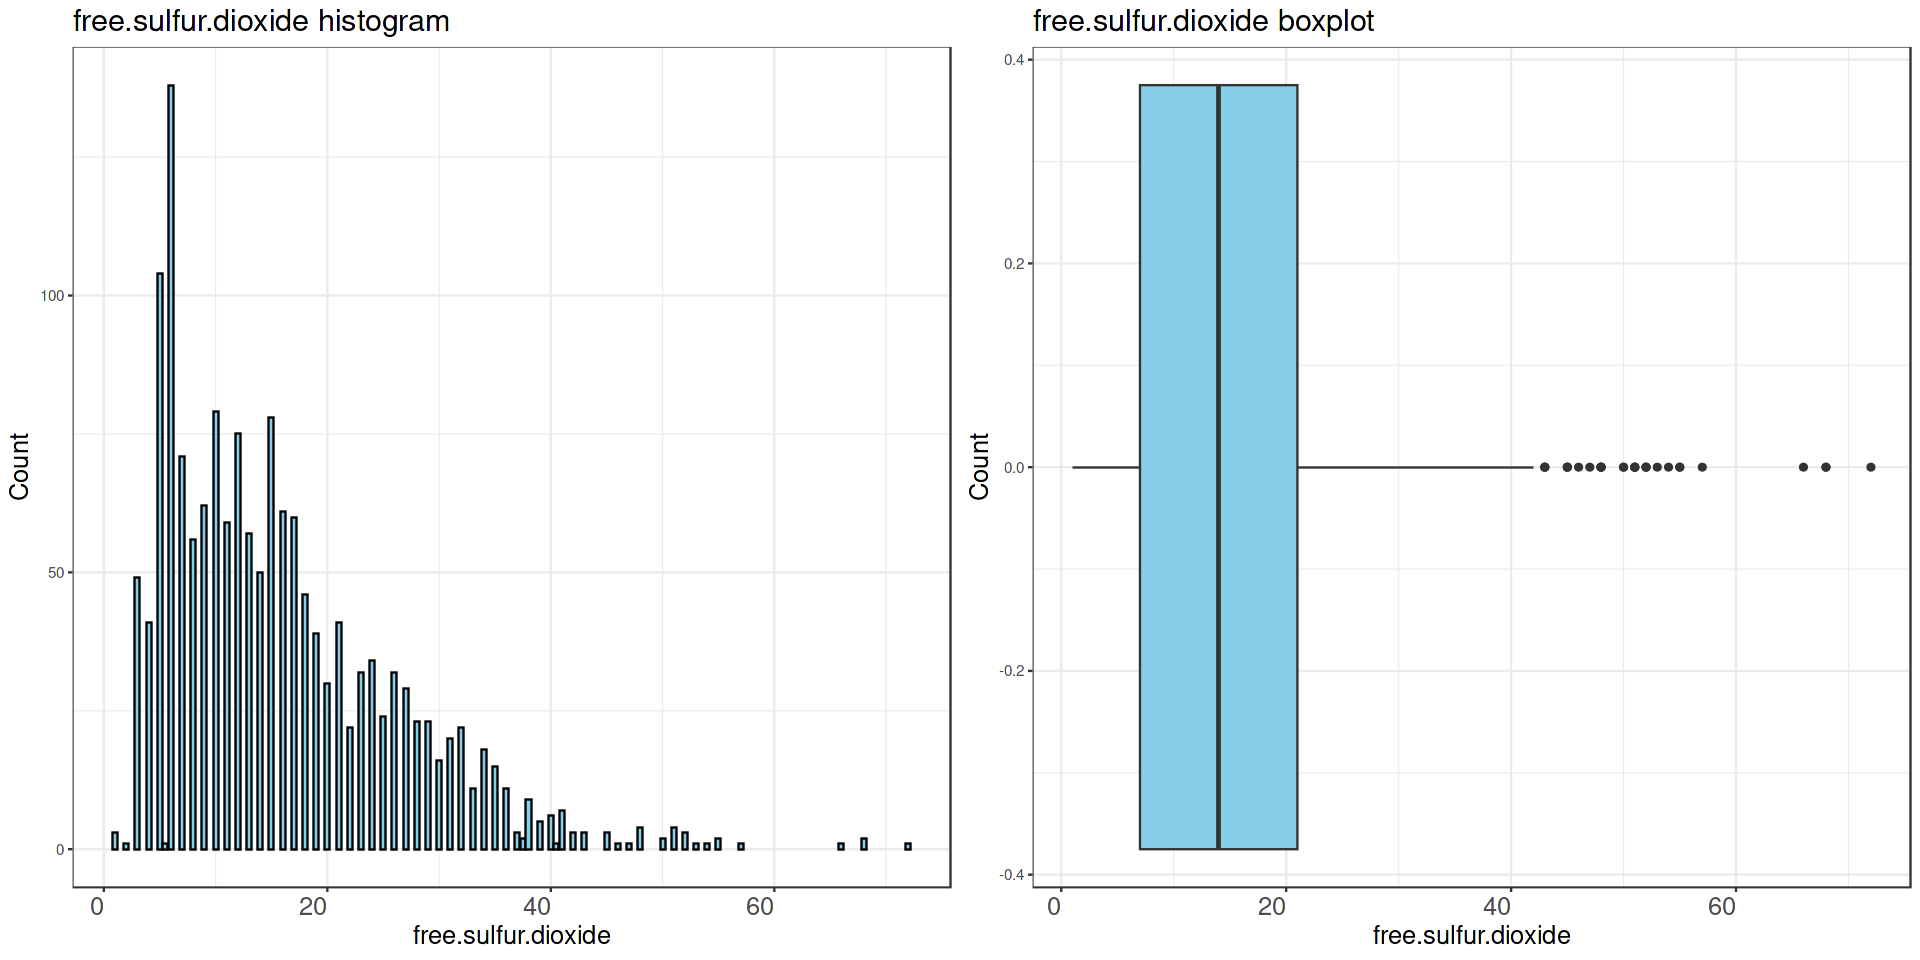

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


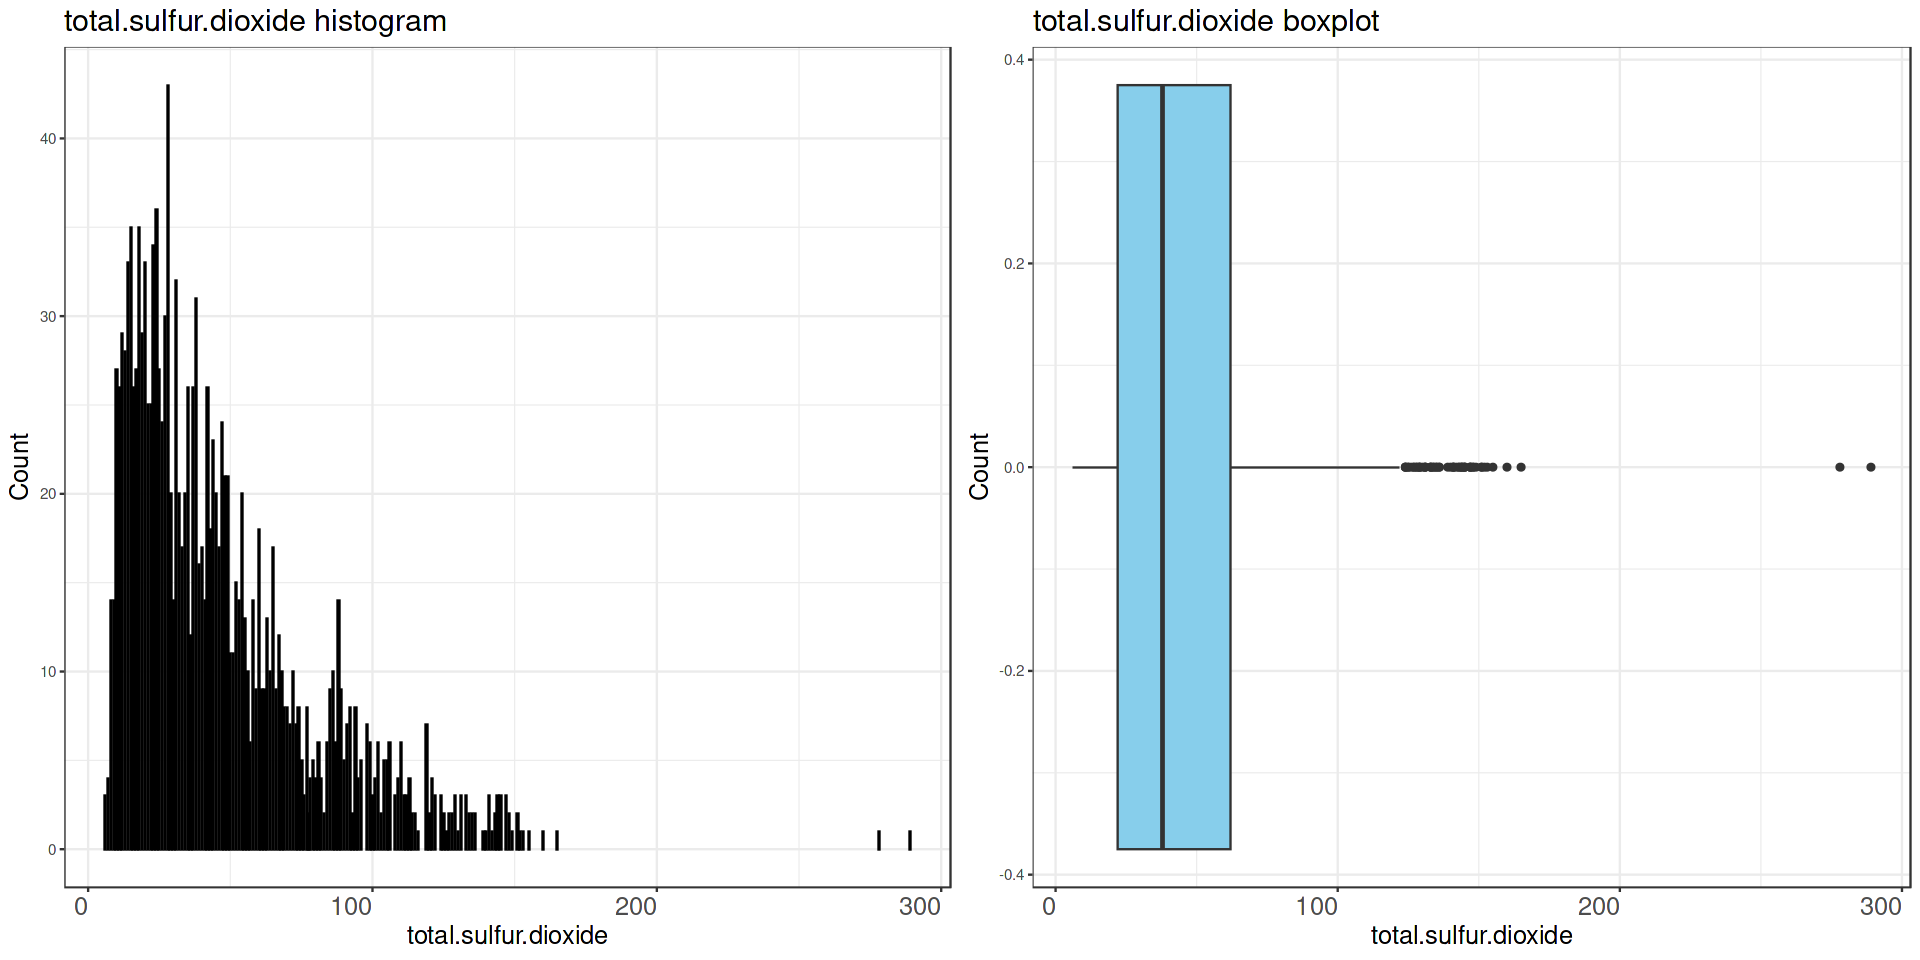

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


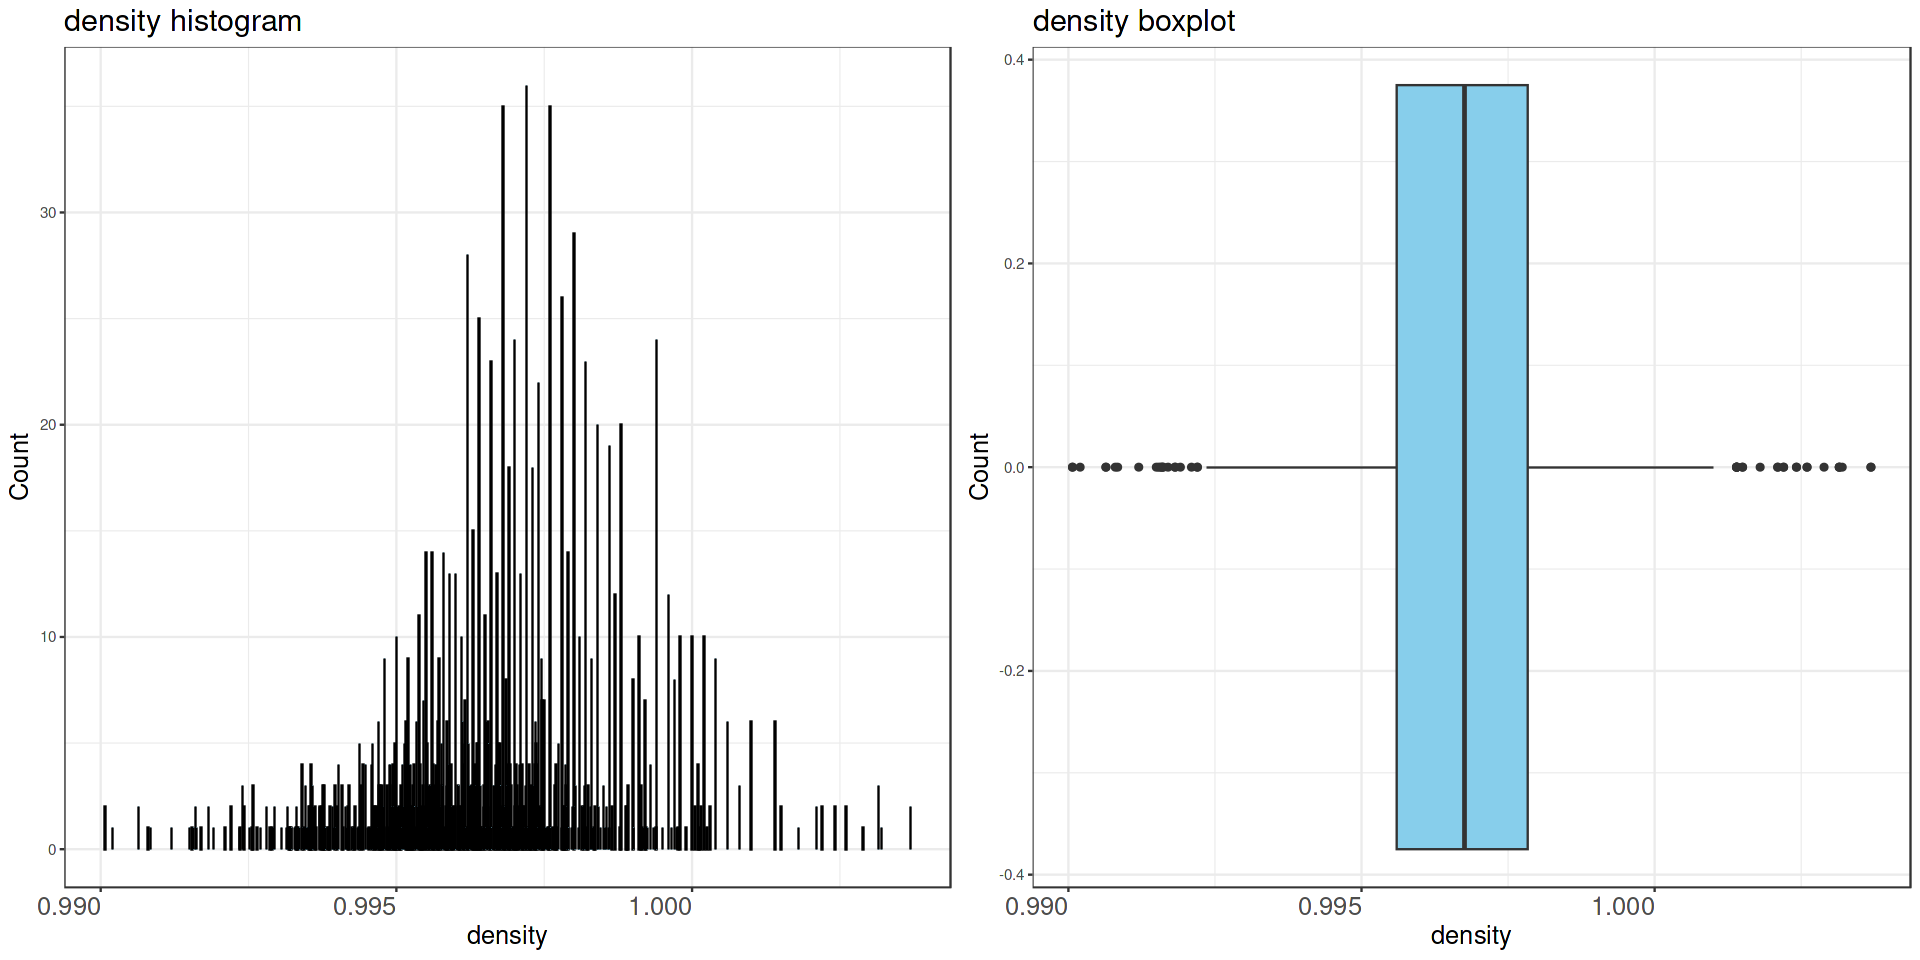

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


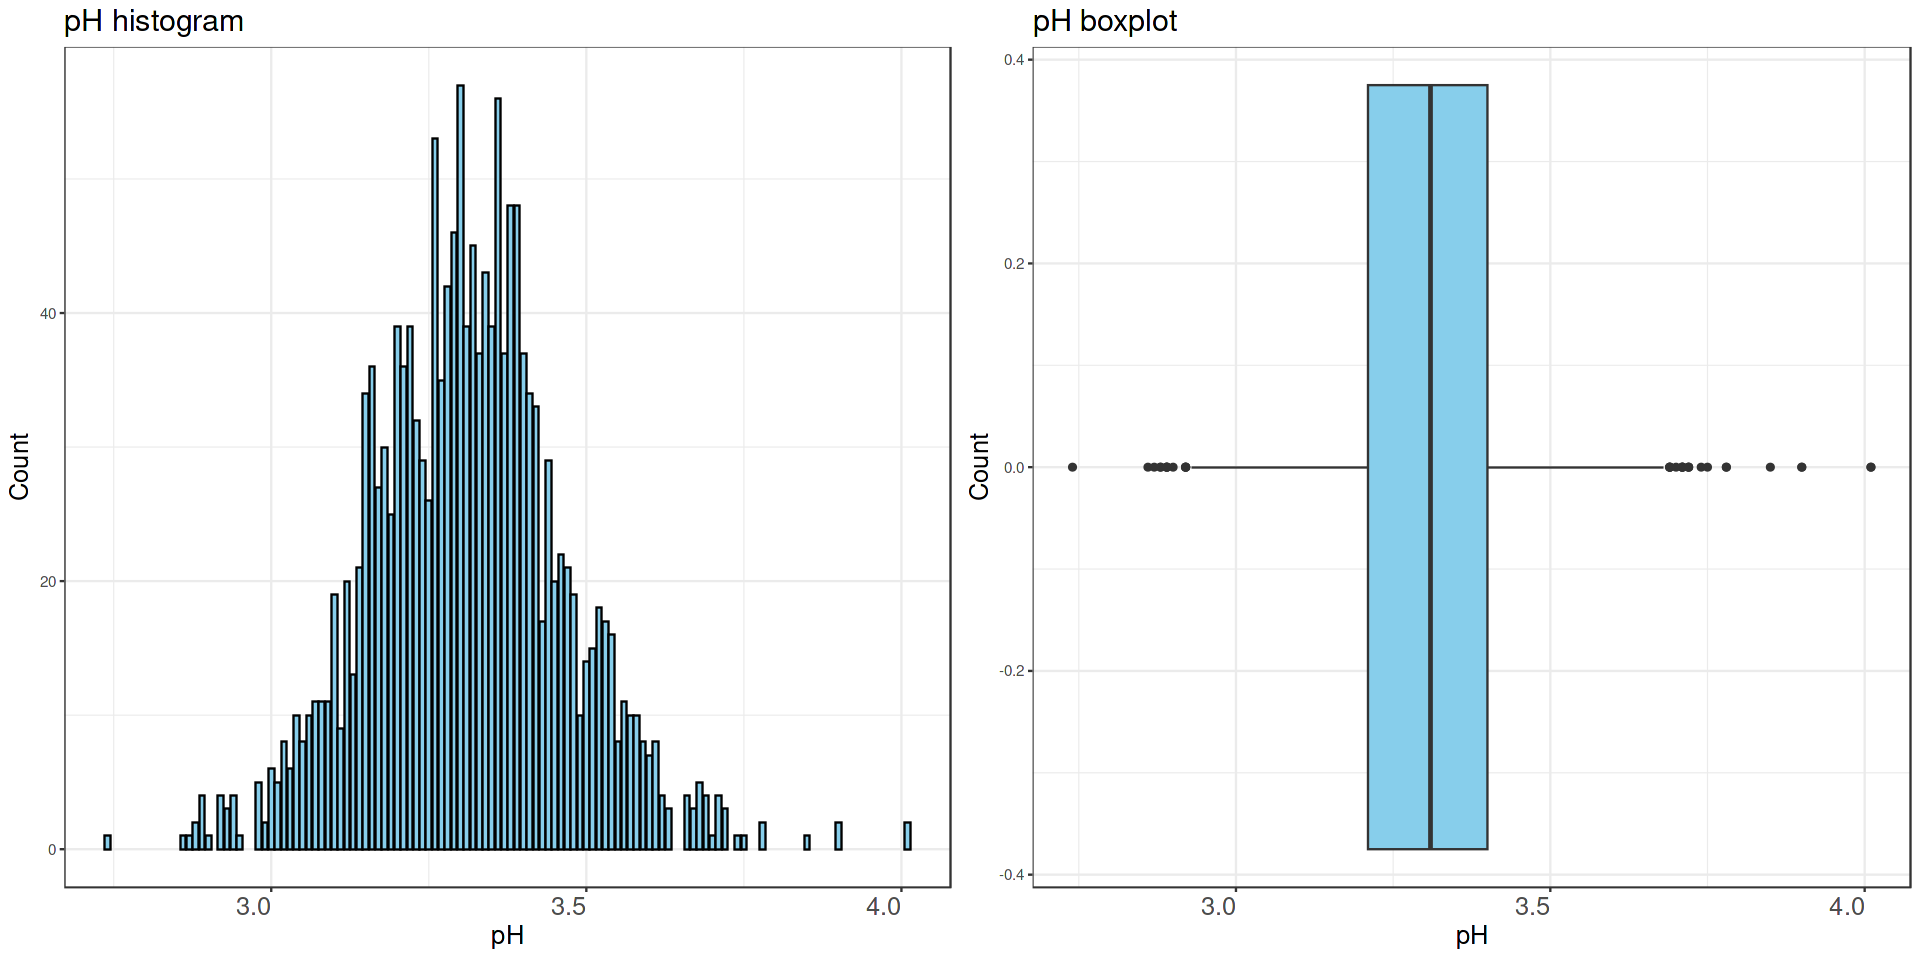

Warning message in geom_histogram(aes(x = df[, i]), fill = "skyblue", col = "black", :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


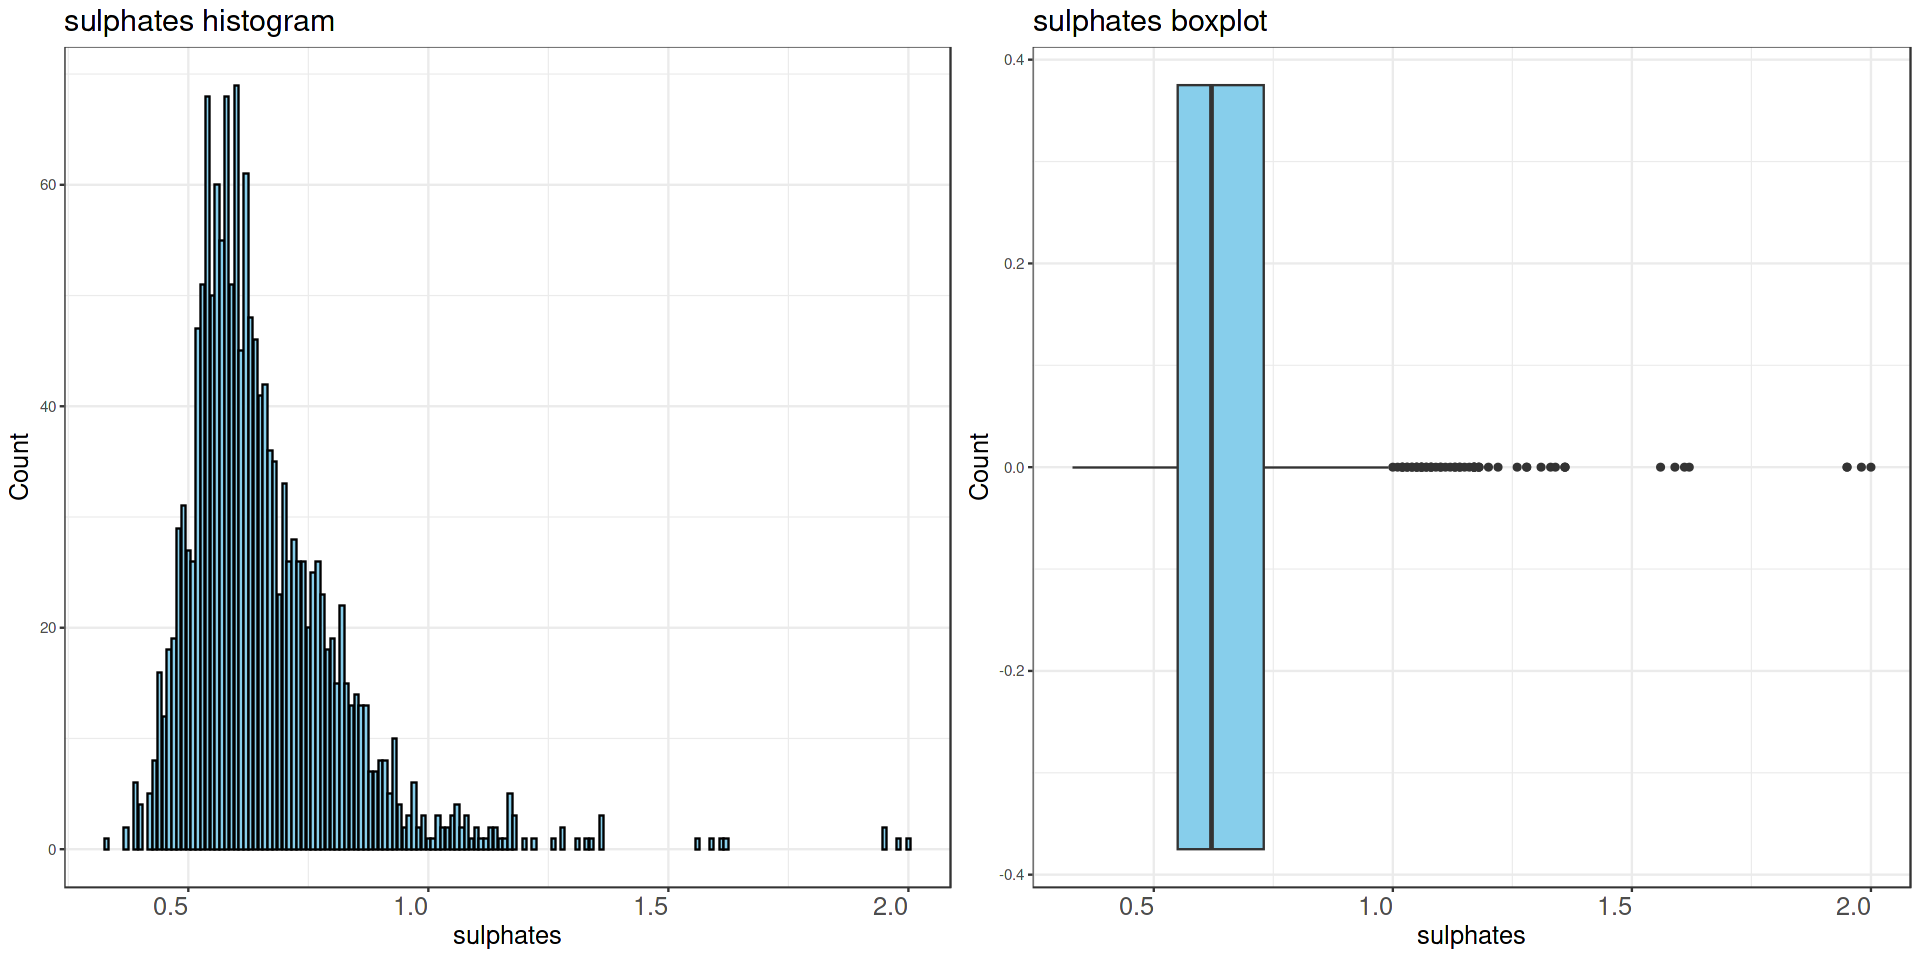

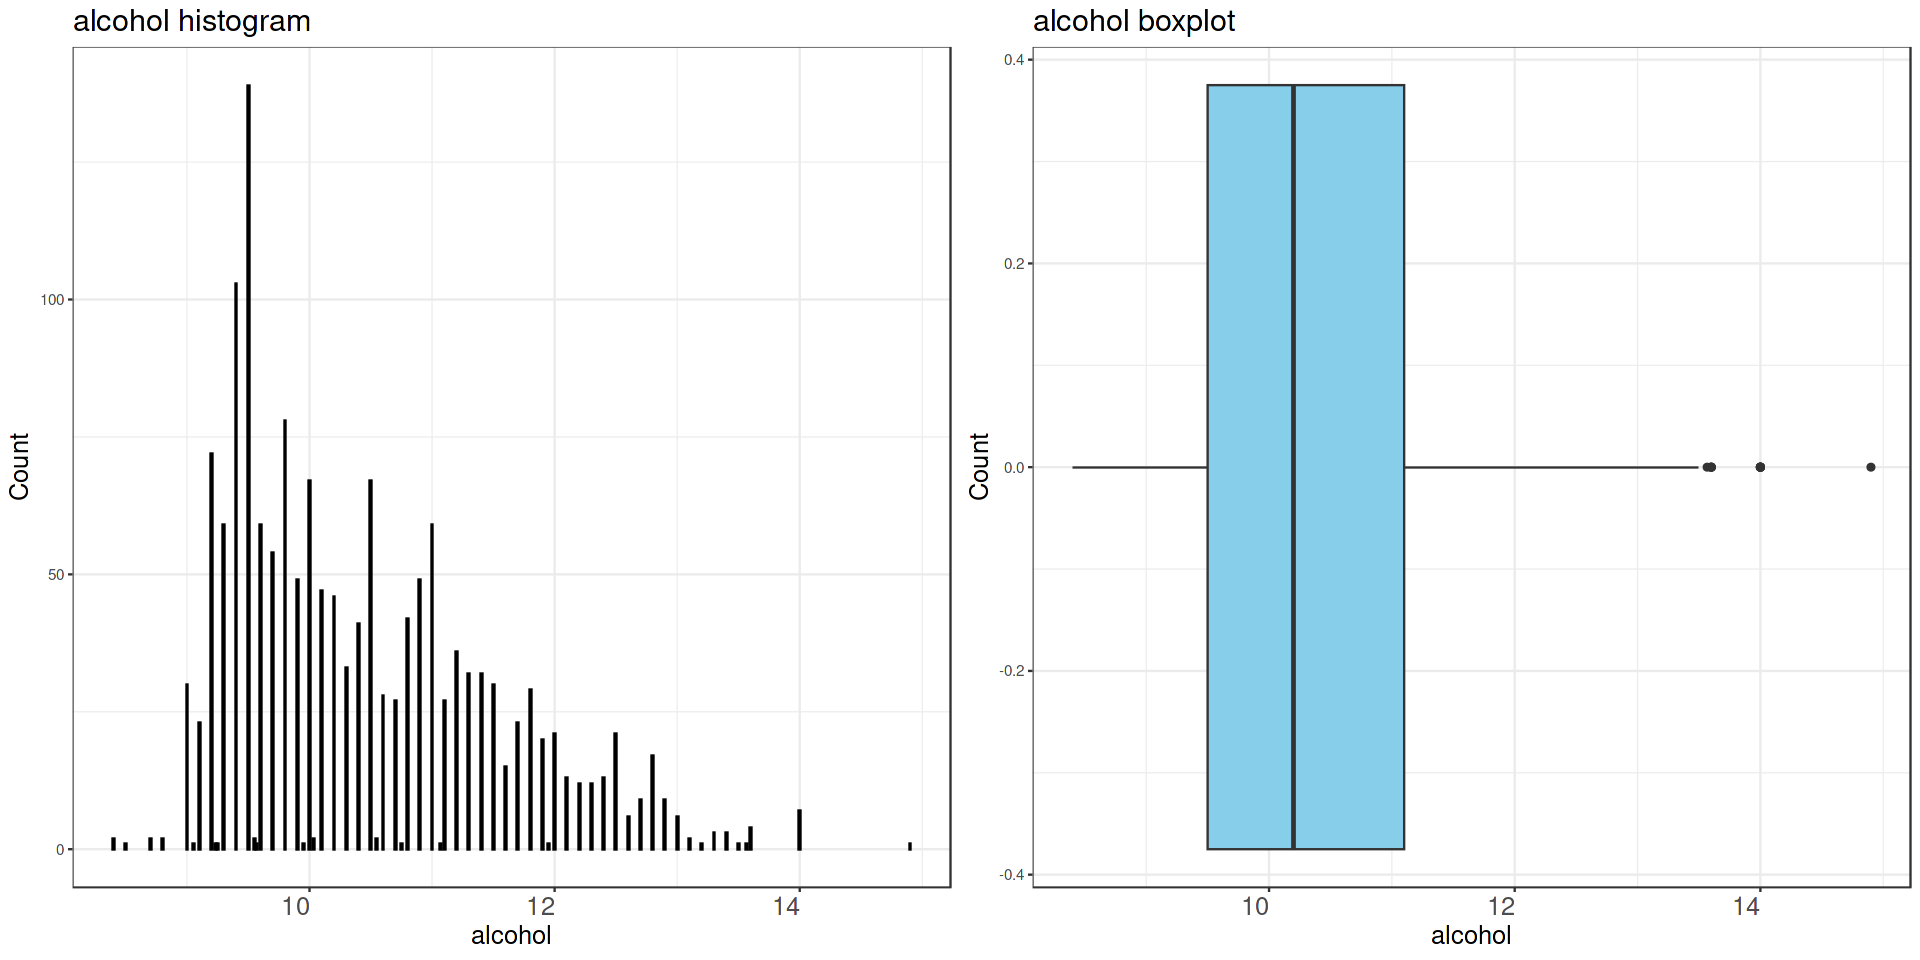

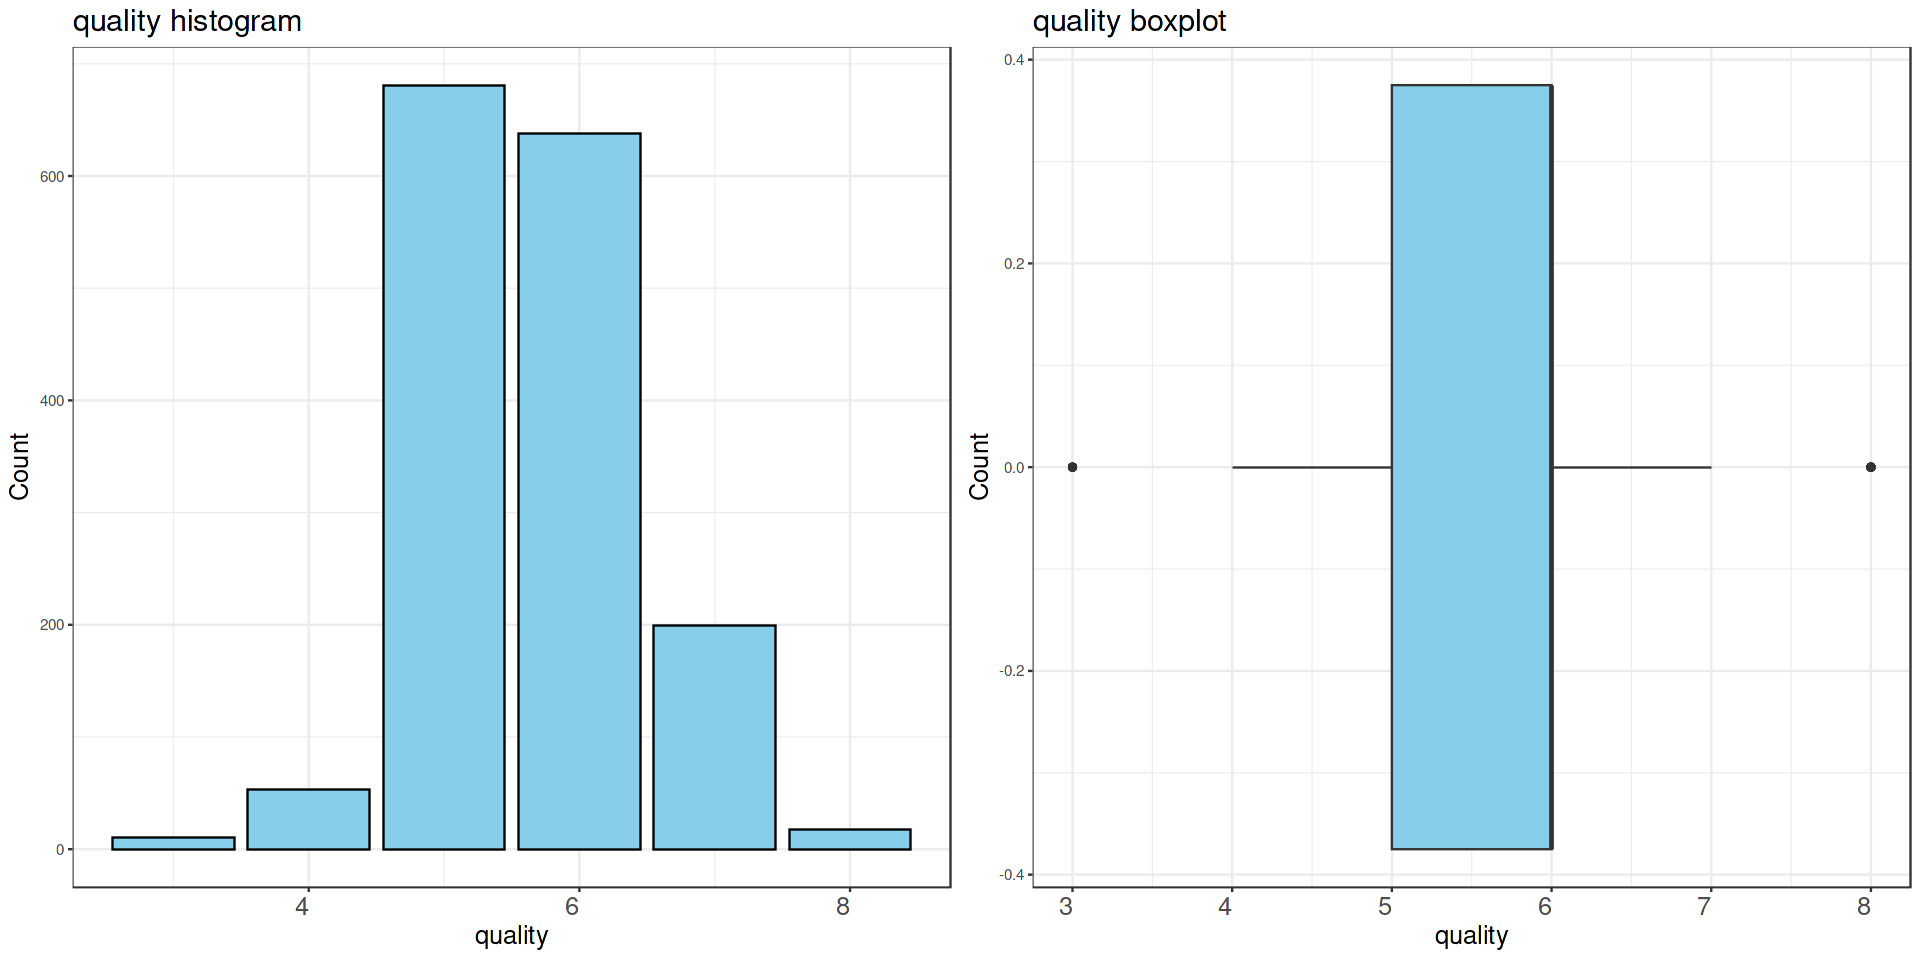

In [13]:
for(i in 2:length(num_cols)){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', stat="count") + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    grid.arrange(a,b , ncol = 2)    
}

## **Correlation**

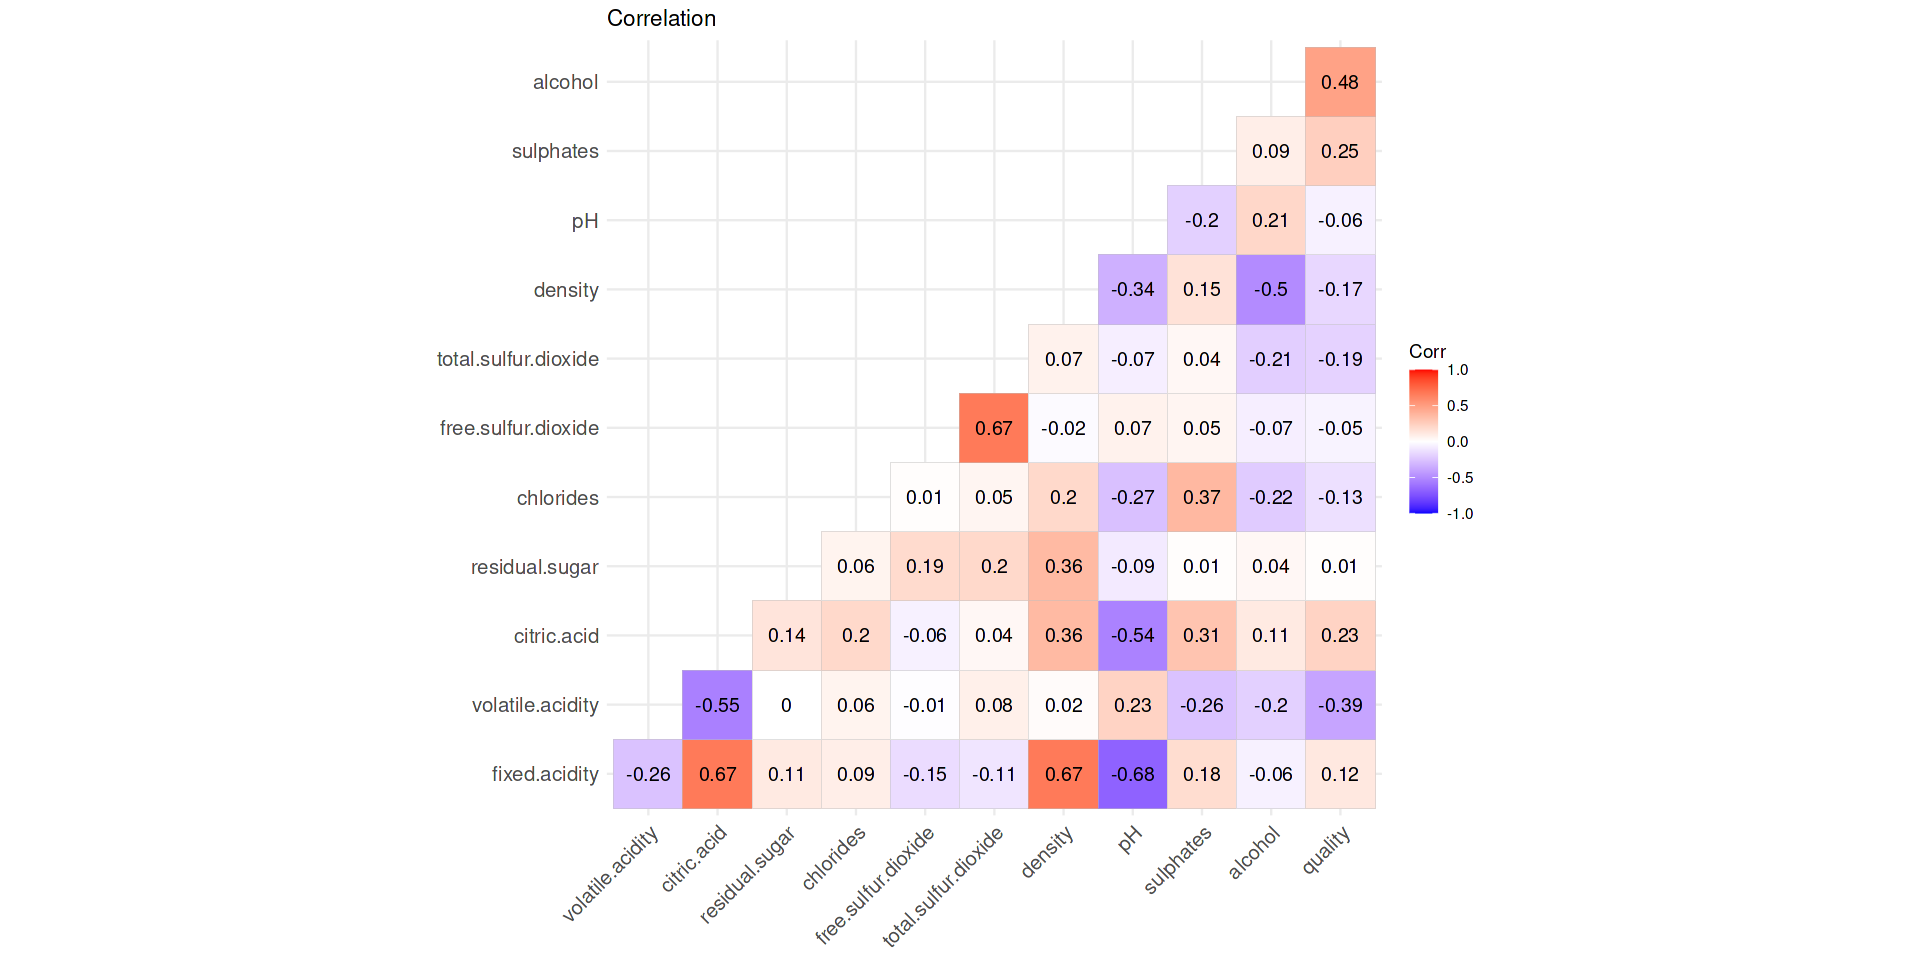

In [14]:
ggcorrplot(cor(df[num_cols]) , type = "lower", lab=T, title = 'Correlation')

# **3. Modeling**

In [15]:
library(tidymodels)
library(finetune)
library(xgboost)
library(bonsai)
library(themis)
library(caret)
library(withr)
library(Metrics)
library(Matrix)
library(mltools)
library(data.table)
library(knitr)
library(kableExtra)
library(patchwork)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()         masks ggplot2::%+%()
✖ scales::alpha()      masks psych::alpha(), ggplot2::alpha()
✖ gridExtra::combine() masks dplyr::combine()
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filter()
✖ recipes::fixed()     masks stringr::fixed()
✖ dplyr::lag()         masks stats::lag()
✖ yardstick::spec()    masks readr::spec()
✖ recipes::step()      masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/




Attaching package: ‘xgboost’




The following object is masked from ‘package:dplyr’:

    slice




Loading required package: lattice




Attaching package: ‘caret’




The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘Metrics’




The following objects are masked from ‘package:caret’:

    precision, recall




The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape





Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack





Attaching package: ‘mltools’




The following objects are masked from ‘package:Metrics’:

    mse, msle, rmse, rmsle




The following objects are masked from ‘package:yardstick’:

    mcc, rmse




The following object is masked from ‘package:tidyr’:

    replace_na





Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose





Attaching package: ‘kableExtra’




The following object is masked from ‘package:dplyr’:

    group_rows




## **Data Preprocessing**

In [16]:
df <- unique(df)

In [17]:
#Standard scale

standard <- function(x){
    return ((x-mean(x))/sd(x))
}

In [18]:
df2 <- as.data.frame(lapply(df,standard))

In [19]:
head(df2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.5242380,0.9316572,-1.392745,-0.46098737,-0.24553242,-0.46838110,-0.3839084,0.58378845,1.29139677,-0.57834844,-0.9540231,-0.7567618
2,-0.2939545,1.9150954,-1.392745,0.05664399,0.20002040,0.87168187,0.6038510,0.04871925,-0.70813480,0.12477564,-0.5843597,-0.7567618
3,-0.2939545,1.2594699,-1.188180,-0.16519802,0.07850599,-0.08550596,0.2147337,0.15573309,-0.32112869,-0.05100538,-0.5843597,-0.7567618
4,1.6634548,-1.3630321,1.471170,-0.46098737,-0.26578482,0.10593160,0.3943263,0.69080229,-0.96613888,-0.46116109,-0.5843597,0.4574522
5,-0.5242380,0.7131154,-1.392745,-0.53493470,-0.26578482,-0.27694353,-0.2043158,0.58378845,1.29139677,-0.57834844,-0.9540231,-0.7567618
6,-0.2363837,0.3853026,-1.085897,-0.68282938,-0.38729922,-0.08550596,0.3643942,-0.16530843,-0.06312462,-1.16428517,-0.9540231,-0.7567618


In [20]:
df2 <- df2[,-12]

In [21]:
df2$quality <- as.factor(df$quality)

In [22]:
head(df2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.5242380,0.9316572,-1.392745,-0.46098737,-0.24553242,-0.46838110,-0.3839084,0.58378845,1.29139677,-0.57834844,-0.9540231,5
2,-0.2939545,1.9150954,-1.392745,0.05664399,0.20002040,0.87168187,0.6038510,0.04871925,-0.70813480,0.12477564,-0.5843597,5
3,-0.2939545,1.2594699,-1.188180,-0.16519802,0.07850599,-0.08550596,0.2147337,0.15573309,-0.32112869,-0.05100538,-0.5843597,5
4,1.6634548,-1.3630321,1.471170,-0.46098737,-0.26578482,0.10593160,0.3943263,0.69080229,-0.96613888,-0.46116109,-0.5843597,6
5,-0.5242380,0.7131154,-1.392745,-0.53493470,-0.26578482,-0.27694353,-0.2043158,0.58378845,1.29139677,-0.57834844,-0.9540231,5
6,-0.2363837,0.3853026,-1.085897,-0.68282938,-0.38729922,-0.08550596,0.3643942,-0.16530843,-0.06312462,-1.16428517,-0.9540231,5


## **Train Test Split**

In [23]:
idx <- sample(nrow(df2), 0.7 * nrow(df2))
train <- df2[idx,]
test <- df2[-idx,]

## **Simple XGB Model**

In [24]:
xgb_rec <-
  recipe(quality ~ ., data = train) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_YeoJohnson(all_numeric_predictors())

In [25]:
xgb_spec <- boost_tree() %>%
  set_engine('xgboost' ,
             nthread  = future::availableCores()) %>%
  set_mode('classification')

In [26]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [27]:
xgb_model =
  xgb_wf %>% 
  fit(train) %>%
  with_seed(7, .)

In [28]:
xgb_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 185.5 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.3, max_depth = 6, gamma = 0, 
    colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 15, watchlist = x$watchlist, 
    verbose = 0, nthread = c(system = 4), objective = "multi:softprob", 
    num_class = 6L)
params (as set within xgb.train):
  eta = "0.3", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "4", objective = "multi:softprob", num_class = "6", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.lo

In [29]:
pred <- predict(xgb_model, test, type = 'class')
pred <- as.data.frame(pred)

In [30]:
cm_xgb <- confusionMatrix(pred$.pred_class, test$quality)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   5   1   0   0
         5   3  11 120  56   7   1
         6   0   4  46  87  21   5
         7   0   0   4  18  16   2
         8   0   0   0   1   0   0

Overall Statistics
                                          
               Accuracy : 0.5466          
                 95% CI : (0.4968, 0.5956)
    No Information Rate : 0.4289          
    P-Value [Acc > NIR] : 1.17e-06        
                                          
                  Kappa : 0.2699          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000  0.00000   0.6857   0.5337  0.36364 0.000000
Specificity          1.000000  0.98473   0.6652   0.6898  0.93407 0.997500
Pos Pred Value            NaN  0.00000   0.6061

## **XGB Model**

In [31]:
xgb_rec <-
  recipe(quality ~ ., data = train) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_YeoJohnson(all_numeric_predictors())

In [32]:
set.seed(123)

cv_fold <- vfold_cv (train, v = 10, strata = "quality")

In [33]:
xgb_spec <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", 
             nthread  = future::availableCores()) %>%
  set_mode(mode = "classification")

In [34]:
xgb_wf <- workflow() %>%
  add_recipe(xgb_rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [35]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

## **Parameters**

In [36]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train_data)

## **Tune Grid**

In [37]:
xgb_res <- tune_grid(
  xgb_wf,
  resamples = cv_fold,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(roc_auc),
  param_info = params
)

i Fold01: preprocessor 1/1



✓ Fold01: preprocessor 1/1



i Fold01: preprocessor 1/1, model 1/4



✓ Fold01: preprocessor 1/1, model 1/4



i Fold01: preprocessor 1/1, model 1/4 (extracts)



i Fold01: preprocessor 1/1, model 1/4 (predictions)



i Fold01: preprocessor 1/1, model 2/4



✓ Fold01: preprocessor 1/1, model 2/4



i Fold01: preprocessor 1/1, model 2/4 (extracts)



i Fold01: preprocessor 1/1, model 2/4 (predictions)



i Fold01: preprocessor 1/1, model 3/4



✓ Fold01: preprocessor 1/1, model 3/4



i Fold01: preprocessor 1/1, model 3/4 (extracts)



i Fold01: preprocessor 1/1, model 3/4 (predictions)



i Fold01: preprocessor 1/1, model 4/4



✓ Fold01: preprocessor 1/1, model 4/4



i Fold01: preprocessor 1/1, model 4/4 (extracts)



i Fold01: preprocessor 1/1, model 4/4 (predictions)



! Fold01: internal:
  ✖ No observations were detected in `truth` for level: 3.
  ℹ Computation will proceed by ignoring those levels.



✓ Fold01: internal



i Fold02: preprocessor 1/1



✓ Fold02: preprocessor 1/1



i Fold02: preprocessor 1/1, model 1/4



✓ Fold02: preprocessor 1/1, model 1/4



i Fold02: preprocessor 1/1, model 1/4 (extracts)



i Fold02: preprocessor 1/1, model 1/4 (predictions)



i Fold02: preprocessor 1/1, model 2/4



✓ Fold02: preprocessor 1/1, model 2/4



i Fold02: preprocessor 1/1, model 2/4 (extracts)



i Fold02: preprocessor 1/1, model 2/4 (predictions)



i Fold02: preprocessor 1/1, model 3/4



✓ Fold02: preprocessor 1/1, model 3/4



i Fold02: preprocessor 1/1, model 3/4 (extracts)



i Fold02: preprocessor 1/1, model 3/4 (predictions)



i Fold02: preprocessor 1/1, model 4/4



✓ Fold02: preprocessor 1/1, model 4/4



i Fold02: preprocessor 1/1, model 4/4 (extracts)



i Fold02: preprocessor 1/1, model 4/4 (predictions)



i Fold03: preprocessor 1/1



✓ Fold03: preprocessor 1/1



i Fold03: preprocessor 1/1, model 1/4



✓ Fold03: preprocessor 1/1, model 1/4



i Fold03: preprocessor 1/1, model 1/4 (extracts)



i Fold03: preprocessor 1/1, model 1/4 (predictions)



i Fold03: preprocessor 1/1, model 2/4



✓ Fold03: preprocessor 1/1, model 2/4



i Fold03: preprocessor 1/1, model 2/4 (extracts)



i Fold03: preprocessor 1/1, model 2/4 (predictions)



i Fold03: preprocessor 1/1, model 3/4



✓ Fold03: preprocessor 1/1, model 3/4



i Fold03: preprocessor 1/1, model 3/4 (extracts)



i Fold03: preprocessor 1/1, model 3/4 (predictions)



i Fold03: preprocessor 1/1, model 4/4



✓ Fold03: preprocessor 1/1, model 4/4



i Fold03: preprocessor 1/1, model 4/4 (extracts)



i Fold03: preprocessor 1/1, model 4/4 (predictions)



! Fold03: internal:
  ✖ No observations were detected in `truth` for leve...
  ℹ Computation will proceed by ignoring those levels.



✓ Fold03: internal



i Fold04: preprocessor 1/1



✓ Fold04: preprocessor 1/1



i Fold04: preprocessor 1/1, model 1/4



✓ Fold04: preprocessor 1/1, model 1/4



i Fold04: preprocessor 1/1, model 1/4 (extracts)



i Fold04: preprocessor 1/1, model 1/4 (predictions)



i Fold04: preprocessor 1/1, model 2/4



✓ Fold04: preprocessor 1/1, model 2/4



i Fold04: preprocessor 1/1, model 2/4 (extracts)



i Fold04: preprocessor 1/1, model 2/4 (predictions)



i Fold04: preprocessor 1/1, model 3/4



✓ Fold04: preprocessor 1/1, model 3/4



i Fold04: preprocessor 1/1, model 3/4 (extracts)



i Fold04: preprocessor 1/1, model 3/4 (predictions)



i Fold04: preprocessor 1/1, model 4/4



✓ Fold04: preprocessor 1/1, model 4/4



i Fold04: preprocessor 1/1, model 4/4 (extracts)



i Fold04: preprocessor 1/1, model 4/4 (predictions)



! Fold04: internal:
  ✖ No observations were detected in `truth` for level: 8.
  ℹ Computation will proceed by ignoring those levels.



✓ Fold04: internal



i Fold05: preprocessor 1/1



✓ Fold05: preprocessor 1/1



i Fold05: preprocessor 1/1, model 1/4



✓ Fold05: preprocessor 1/1, model 1/4



i Fold05: preprocessor 1/1, model 1/4 (extracts)



i Fold05: preprocessor 1/1, model 1/4 (predictions)



i Fold05: preprocessor 1/1, model 2/4



✓ Fold05: preprocessor 1/1, model 2/4



i Fold05: preprocessor 1/1, model 2/4 (extracts)



i Fold05: preprocessor 1/1, model 2/4 (predictions)



i Fold05: preprocessor 1/1, model 3/4



✓ Fold05: preprocessor 1/1, model 3/4



i Fold05: preprocessor 1/1, model 3/4 (extracts)



i Fold05: preprocessor 1/1, model 3/4 (predictions)



i Fold05: preprocessor 1/1, model 4/4



✓ Fold05: preprocessor 1/1, model 4/4



i Fold05: preprocessor 1/1, model 4/4 (extracts)



i Fold05: preprocessor 1/1, model 4/4 (predictions)



! Fold05: internal:
  ✖ No observations were detected in `truth` for leve...
  ℹ Computation will proceed by ignoring those levels.



✓ Fold05: internal



i Fold06: preprocessor 1/1



✓ Fold06: preprocessor 1/1



i Fold06: preprocessor 1/1, model 1/4



✓ Fold06: preprocessor 1/1, model 1/4



i Fold06: preprocessor 1/1, model 1/4 (extracts)



i Fold06: preprocessor 1/1, model 1/4 (predictions)



i Fold06: preprocessor 1/1, model 2/4



✓ Fold06: preprocessor 1/1, model 2/4



i Fold06: preprocessor 1/1, model 2/4 (extracts)



i Fold06: preprocessor 1/1, model 2/4 (predictions)



i Fold06: preprocessor 1/1, model 3/4



✓ Fold06: preprocessor 1/1, model 3/4



i Fold06: preprocessor 1/1, model 3/4 (extracts)



i Fold06: preprocessor 1/1, model 3/4 (predictions)



i Fold06: preprocessor 1/1, model 4/4



✓ Fold06: preprocessor 1/1, model 4/4



i Fold06: preprocessor 1/1, model 4/4 (extracts)



i Fold06: preprocessor 1/1, model 4/4 (predictions)



i Fold07: preprocessor 1/1



✓ Fold07: preprocessor 1/1



i Fold07: preprocessor 1/1, model 1/4



✓ Fold07: preprocessor 1/1, model 1/4



i Fold07: preprocessor 1/1, model 1/4 (extracts)



i Fold07: preprocessor 1/1, model 1/4 (predictions)



i Fold07: preprocessor 1/1, model 2/4



✓ Fold07: preprocessor 1/1, model 2/4



i Fold07: preprocessor 1/1, model 2/4 (extracts)



i Fold07: preprocessor 1/1, model 2/4 (predictions)



i Fold07: preprocessor 1/1, model 3/4



✓ Fold07: preprocessor 1/1, model 3/4



i Fold07: preprocessor 1/1, model 3/4 (extracts)



i Fold07: preprocessor 1/1, model 3/4 (predictions)



i Fold07: preprocessor 1/1, model 4/4



✓ Fold07: preprocessor 1/1, model 4/4



i Fold07: preprocessor 1/1, model 4/4 (extracts)



i Fold07: preprocessor 1/1, model 4/4 (predictions)



i Fold08: preprocessor 1/1



✓ Fold08: preprocessor 1/1



i Fold08: preprocessor 1/1, model 1/4



✓ Fold08: preprocessor 1/1, model 1/4



i Fold08: preprocessor 1/1, model 1/4 (extracts)



i Fold08: preprocessor 1/1, model 1/4 (predictions)



i Fold08: preprocessor 1/1, model 2/4



✓ Fold08: preprocessor 1/1, model 2/4



i Fold08: preprocessor 1/1, model 2/4 (extracts)



i Fold08: preprocessor 1/1, model 2/4 (predictions)



i Fold08: preprocessor 1/1, model 3/4



✓ Fold08: preprocessor 1/1, model 3/4



i Fold08: preprocessor 1/1, model 3/4 (extracts)



i Fold08: preprocessor 1/1, model 3/4 (predictions)



i Fold08: preprocessor 1/1, model 4/4



✓ Fold08: preprocessor 1/1, model 4/4



i Fold08: preprocessor 1/1, model 4/4 (extracts)



i Fold08: preprocessor 1/1, model 4/4 (predictions)



! Fold08: internal:
  ✖ No observations were detected in `truth` for leve...
  ℹ Computation will proceed by ignoring those levels.



✓ Fold08: internal



i Fold09: preprocessor 1/1



✓ Fold09: preprocessor 1/1



i Fold09: preprocessor 1/1, model 1/4



✓ Fold09: preprocessor 1/1, model 1/4



i Fold09: preprocessor 1/1, model 1/4 (extracts)



i Fold09: preprocessor 1/1, model 1/4 (predictions)



i Fold09: preprocessor 1/1, model 2/4



✓ Fold09: preprocessor 1/1, model 2/4



i Fold09: preprocessor 1/1, model 2/4 (extracts)



i Fold09: preprocessor 1/1, model 2/4 (predictions)



i Fold09: preprocessor 1/1, model 3/4



✓ Fold09: preprocessor 1/1, model 3/4



i Fold09: preprocessor 1/1, model 3/4 (extracts)



i Fold09: preprocessor 1/1, model 3/4 (predictions)



i Fold09: preprocessor 1/1, model 4/4



✓ Fold09: preprocessor 1/1, model 4/4



i Fold09: preprocessor 1/1, model 4/4 (extracts)



i Fold09: preprocessor 1/1, model 4/4 (predictions)



i Fold10: preprocessor 1/1



✓ Fold10: preprocessor 1/1



i Fold10: preprocessor 1/1, model 1/4



✓ Fold10: preprocessor 1/1, model 1/4



i Fold10: preprocessor 1/1, model 1/4 (extracts)



i Fold10: preprocessor 1/1, model 1/4 (predictions)



i Fold10: preprocessor 1/1, model 2/4



✓ Fold10: preprocessor 1/1, model 2/4



i Fold10: preprocessor 1/1, model 2/4 (extracts)



i Fold10: preprocessor 1/1, model 2/4 (predictions)



i Fold10: preprocessor 1/1, model 3/4



✓ Fold10: preprocessor 1/1, model 3/4



i Fold10: preprocessor 1/1, model 3/4 (extracts)



i Fold10: preprocessor 1/1, model 3/4 (predictions)



i Fold10: preprocessor 1/1, model 4/4



✓ Fold10: preprocessor 1/1, model 4/4



i Fold10: preprocessor 1/1, model 4/4 (extracts)



i Fold10: preprocessor 1/1, model 4/4 (predictions)



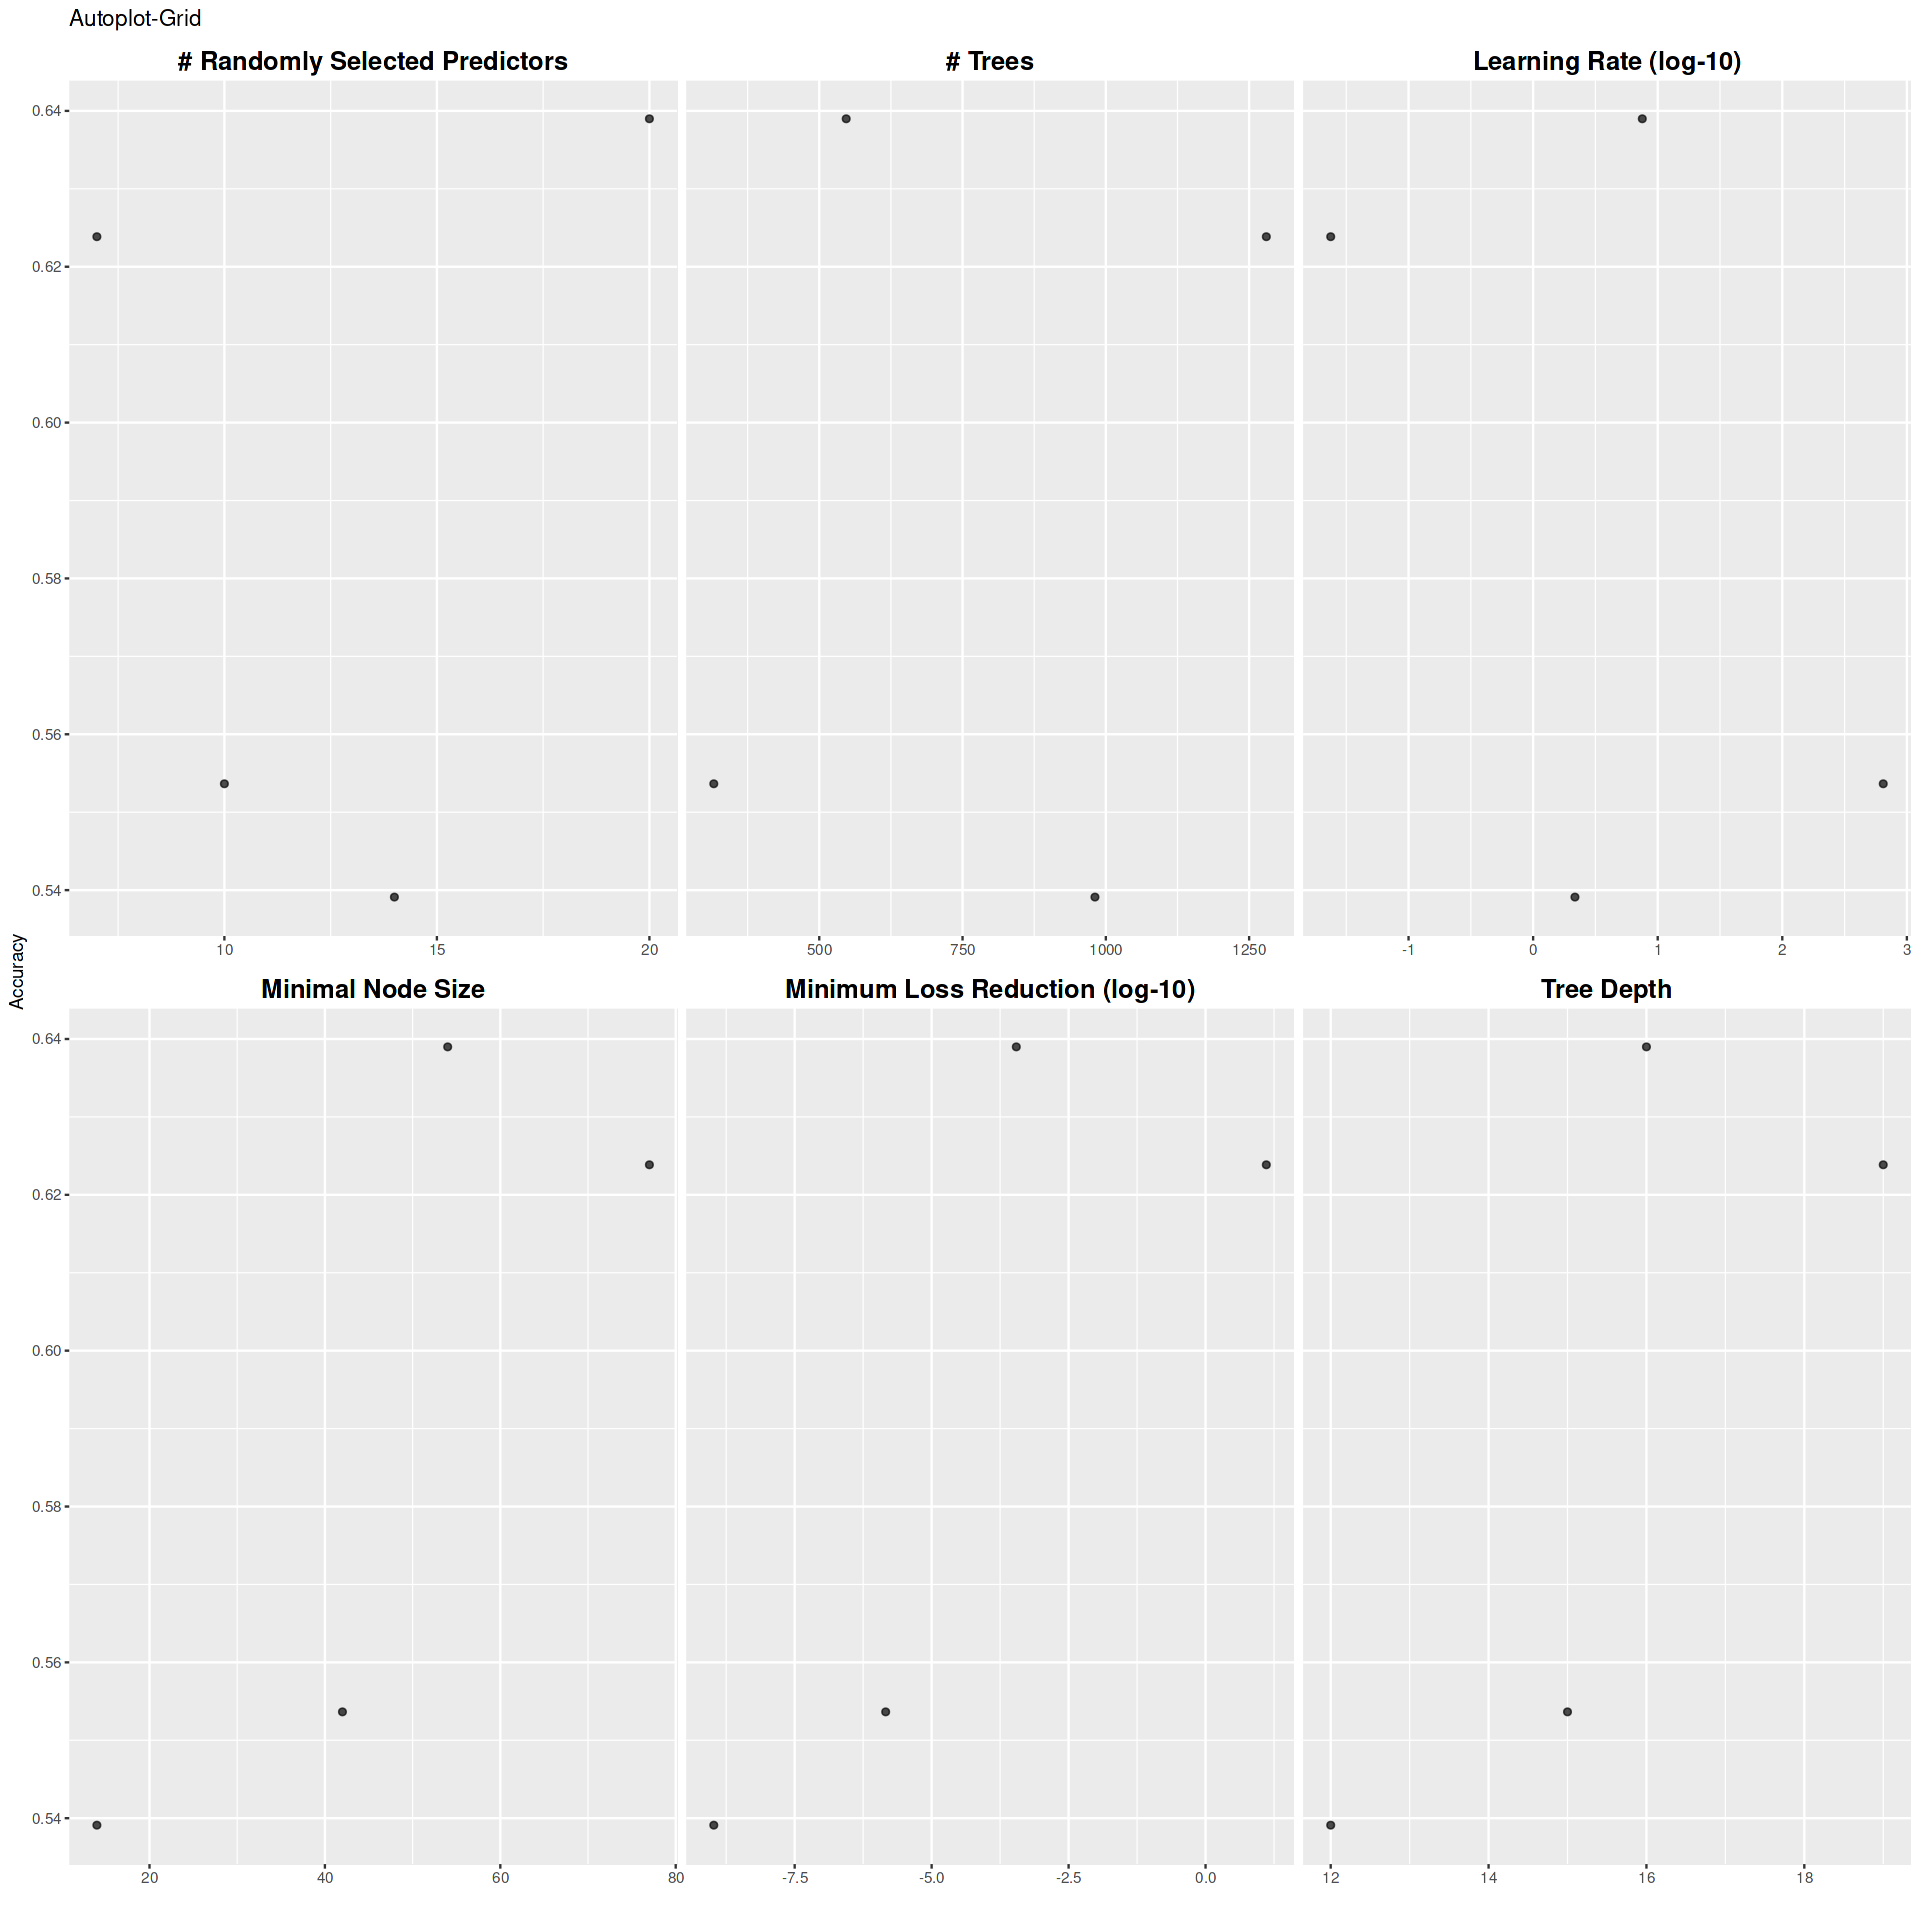

In [38]:
options(repr.plot.width = 16.0, repr.plot.height = 16.0)

autoplot(xgb_res) +
  theme(
    legend.position = "top",
    strip.background = element_rect(fill = "white"),
    strip.background.x = element_rect(colour = "white"),
    strip.background.y = element_rect(colour = "white"),
    strip.text = element_text(
      color = "black",
      face = "bold",
      size = 15
    ),
    
  ) +
  labs(title = "Autoplot-Grid",
    y = "Accuracy")

In [39]:
show_best(xgb_res, metric = "roc_auc") %>%
  kbl() %>%
  kable_classic(full_width = F, position = "left")

<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; width: auto !important; '>
 <thead>
  <tr>
   <th style="text-align:right;"> mtry </th>
   <th style="text-align:right;"> trees </th>
   <th style="text-align:right;"> min_n </th>
   <th style="text-align:right;"> tree_depth </th>
   <th style="text-align:right;"> learn_rate </th>
   <th style="text-align:right;"> loss_reduction </th>
   <th style="text-align:left;"> .metric </th>
   <th style="text-align:left;"> .estimator </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> std_err </th>
   <th style="text-align:left;"> .config </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 20 </td>
   <td style="text-align:right;"> 547 </td>
   <td style="text-align:right;"> 54 </td>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 7.5207299 </td>
   <td style="text-align:ri

<table class=" lightable-classic" style='font-family: "Arial Narrow", "Source Sans Pro", sans-serif; width: auto !important; '>
 <thead>
  <tr>
   <th style="text-align:right;"> mtry </th>
   <th style="text-align:right;"> trees </th>
   <th style="text-align:right;"> min_n </th>
   <th style="text-align:right;"> tree_depth </th>
   <th style="text-align:right;"> learn_rate </th>
   <th style="text-align:right;"> loss_reduction </th>
   <th style="text-align:left;"> .metric </th>
   <th style="text-align:left;"> .estimator </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> std_err </th>
   <th style="text-align:left;"> .config </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 543 </td>
   <td style="text-align:right;"> 53 </td>
   <td style="text-align:right;"> 11 </td>
   <td style="text-align:right;"> 0.0613953 </td>
   <td style="text-align:right;"> 0.0000000 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> hand_till </td>
   <td style="text-align:right;"> 0.6990621 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0126436 </td>
   <td style="text-align:left;"> Preprocessor1_Model3 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 8 </td>
   <td style="text-align:right;"> 1231 </td>
   <td style="text-align:right;"> 63 </td>
   <td style="text-align:right;"> 15 </td>
   <td style="text-align:right;"> 0.0161443 </td>
   <td style="text-align:right;"> 3.4277217 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> hand_till </td>
   <td style="text-align:right;"> 0.6755526 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0184932 </td>
   <td style="text-align:left;"> Preprocessor1_Model1 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 17 </td>
   <td style="text-align:right;"> 777 </td>
   <td style="text-align:right;"> 76 </td>
   <td style="text-align:right;"> 18 </td>
   <td style="text-align:right;"> 0.0324412 </td>
   <td style="text-align:right;"> 0.0000676 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> hand_till </td>
   <td style="text-align:right;"> 0.6722815 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0167096 </td>
   <td style="text-align:left;"> Preprocessor1_Model4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 12 </td>
   <td style="text-align:right;"> 1377 </td>
   <td style="text-align:right;"> 84 </td>
   <td style="text-align:right;"> 16 </td>
   <td style="text-align:right;"> 0.0192210 </td>
   <td style="text-align:right;"> 0.0000117 </td>
   <td style="text-align:left;"> roc_auc </td>
   <td style="text-align:left;"> hand_till </td>
   <td style="text-align:right;"> 0.6620151 </td>
   <td style="text-align:right;"> 10 </td>
   <td style="text-align:right;"> 0.0127687 </td>
   <td style="text-align:left;"> Preprocessor1_Model2 </td>
  </tr>
</tbody>
</table>

In [40]:
xgb_best <- select_best(xgb_res, metric = "roc_auc")

In [41]:
xgb_best

mtry,trees,min_n,tree_depth,learn_rate,loss_reduction,.config
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
20,547,54,16,7.52073,0.0003509669,Preprocessor1_Model4


In [42]:
set.seed(123)

final_xgb_res <-
  xgb_wf %>%
  finalize_workflow(xgb_best) 

final_xgb_res 

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = 20
  trees = 547
  min_n = 54
  tree_depth = 16
  learn_rate = 7.52072986353252
  loss_reduction = 0.000350966860176949

Engine-Specific Arguments:
  nthread = future::availableCores()

Computational engine: xgboost 


In [43]:
final_fit <- xgb_wf %>%
  finalize_workflow(select_best(xgb_res, metric = "roc_auc")) %>%
  fit(train)

In [44]:
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_dummy()
• step_YeoJohnson()

── Model ───────────────────────────────────────────────────────────────────────
##### xgb.Booster
raw: 2.2 Mb 
call:
  xgboost::xgb.train(params = list(eta = 7.52072986353252, max_depth = 16L, 
    gamma = 0.000350966860176949, colsample_bytree = 1, colsample_bynode = 1, 
    min_child_weight = 54L, subsample = 1), data = x$data, nrounds = 547L, 
    watchlist = x$watchlist, verbose = 0, nthread = c(system = 4), 
    objective = "multi:softprob", num_class = 6L)
params (as set within xgb.train):
  eta = "7.52072986353252", max_depth = "16", gamma = "0.000350966860176949", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "54", subsample = "1", nthread = "4", objective = "multi:softprob", num_class = "6", validate_par

In [45]:
pred <- predict(final_fit, new_data = test, type = 'class')

In [46]:
pred <- as.data.frame(pred)
cm_xgb <- confusionMatrix(pred$.pred_class, test$quality)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   2   6 129  67   5   1
         6   1   9  46  96  39   7
         7   0   0   0   0   0   0
         8   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.5515          
                 95% CI : (0.5018, 0.6004)
    No Information Rate : 0.4289          
    P-Value [Acc > NIR] : 4.327e-07       
                                          
                  Kappa : 0.2337          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity          0.000000  0.00000   0.7371   0.5890   0.0000  0.00000
Specificity          1.000000  1.00000   0.6524   0.5837   1.0000  1.00000
Pos Pred Value            NaN      NaN   0.6143

**Please leave your advice in the comments. Thank you**